In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import sys
import imageio

import pypom

# Project some points

[cam0]::Extrinsics converted from 'cm' to 'm'.
[[341.90338929 556.93075901]
 [334.7530225  523.73041378]
 [327.43616917 489.75704381]
 ...
 [757.32412374 308.77401418]
 [754.63451283 267.85151882]
 [751.87371395 225.84589677]]


<IPython.core.display.Javascript object>


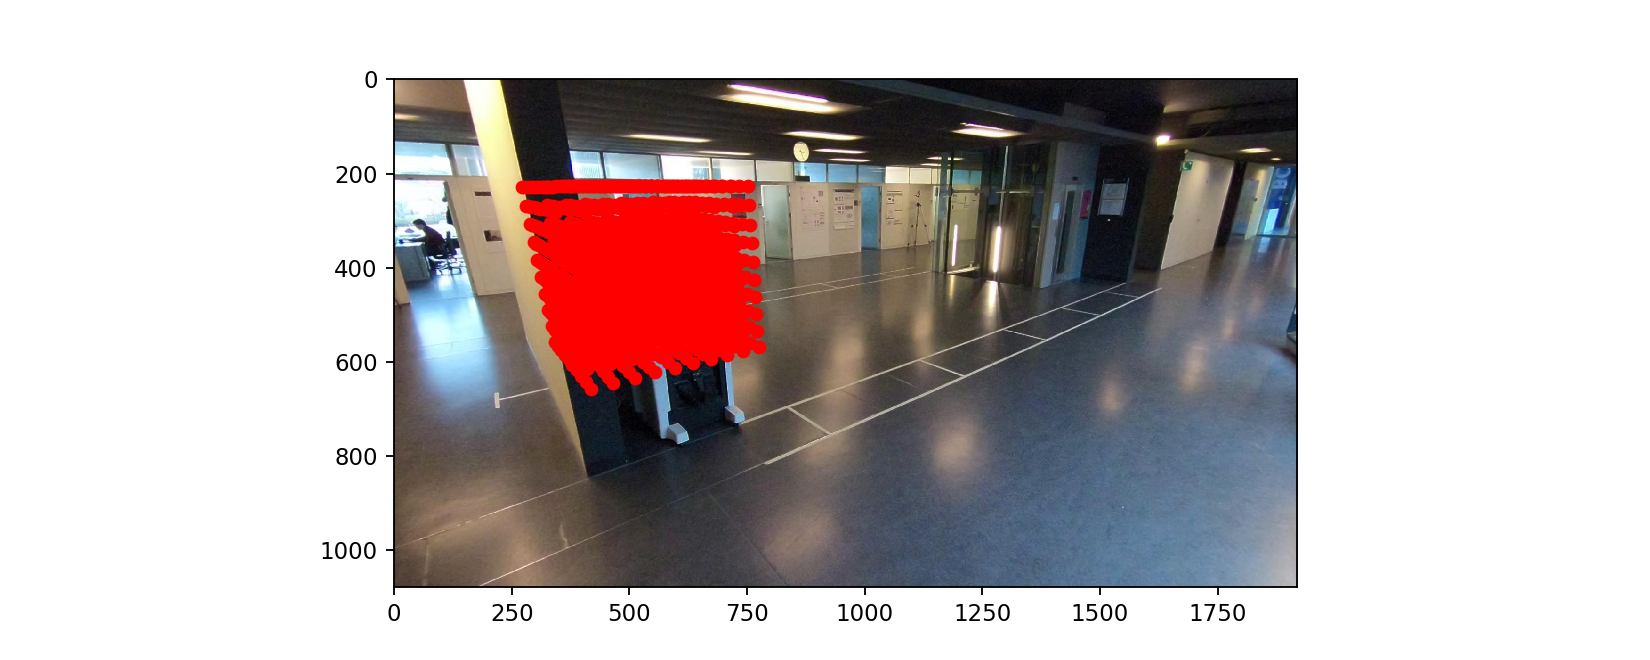

In [3]:
camera = pypom.CameraKRt.from_json("cam0", "intrinsics_cam0.json", "extrinsics_cam0.json", (1080, 1920), "m")

grid = np.meshgrid(np.linspace(0,-2,10), np.linspace(0,-2,10), np.linspace(0,2,10))
grid = np.vstack([g.ravel() for g in grid]).T

proj = camera.project_points(grid)
print(proj)

img = imageio.imread("frame_cam0_undistorted.JPG")

plt.figure(figsize=(10,4))
plt.imshow(img)
plt.plot(proj[:,0], proj[:,1], 'r.', markersize=10)

# Change the scale

[cam0]::Extrinsics converted from 'cm' to 'm'.
[[56.98389822 92.82179317]
 [46.47202287 44.01340326]]


<IPython.core.display.Javascript object>


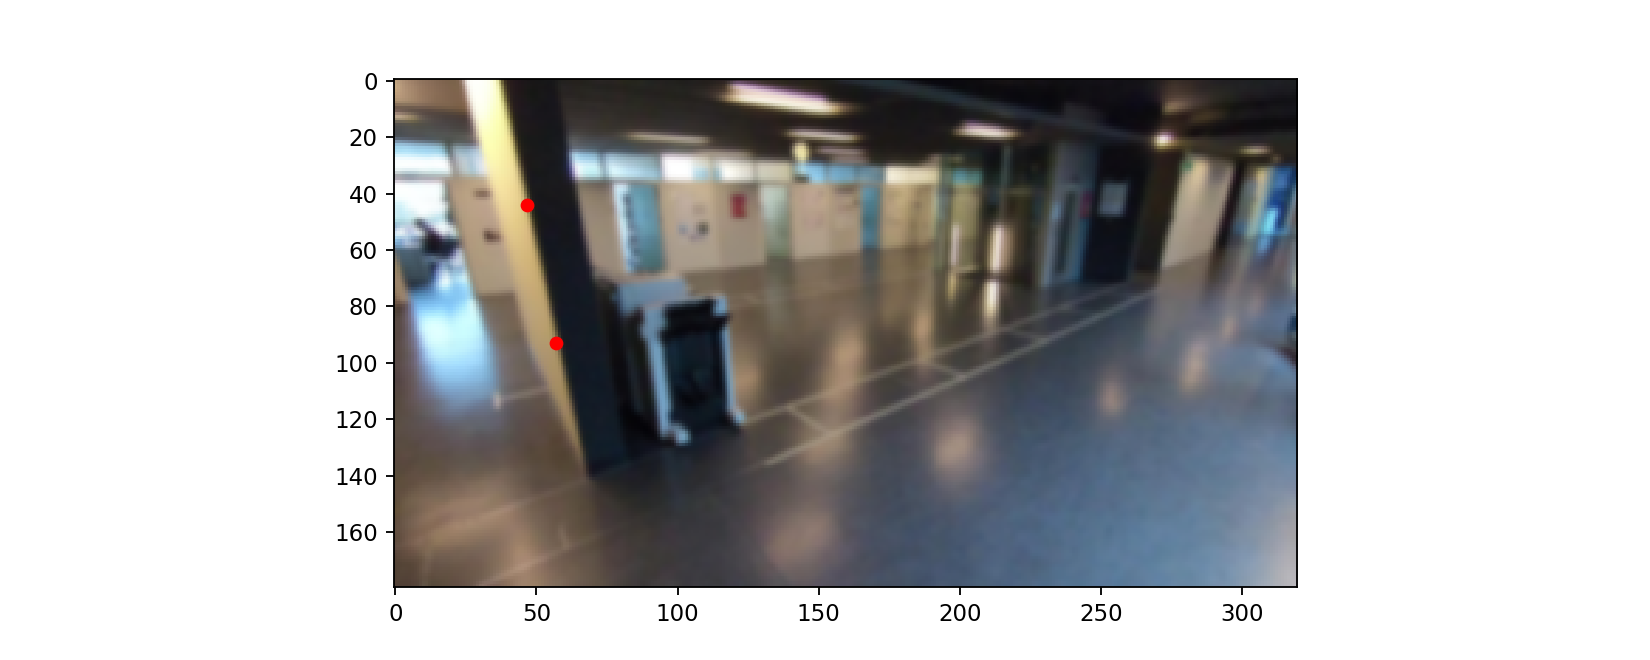

In [7]:
view_shape = (1080//6, 1920//6)
camera = pypom.CameraKRt.from_json("cam0", "intrinsics_cam0.json", "extrinsics_cam0.json", view_shape=view_shape, unit="m")

world_points = np.array([[0,0,  0],  # this is feet position in 'm'
                         [0,0,1.8]]) # this is head position in 'm'

proj = camera.project_points(world_points)
print(proj)

img = imageio.imread("frame_cam0_undistorted.JPG")

img = pypom.utils.downsample_image(imageio.imread("frame_cam0_undistorted.JPG"), view_shape)

plt.figure(figsize=(10,4))
plt.imshow(img)
plt.plot(proj[:,0], proj[:,1], 'r.', markersize=10)

# Use ground homography and average head height

[[109.68128178 184.3309544 ]
 [ 92.         109.68128178]]


<IPython.core.display.Javascript object>


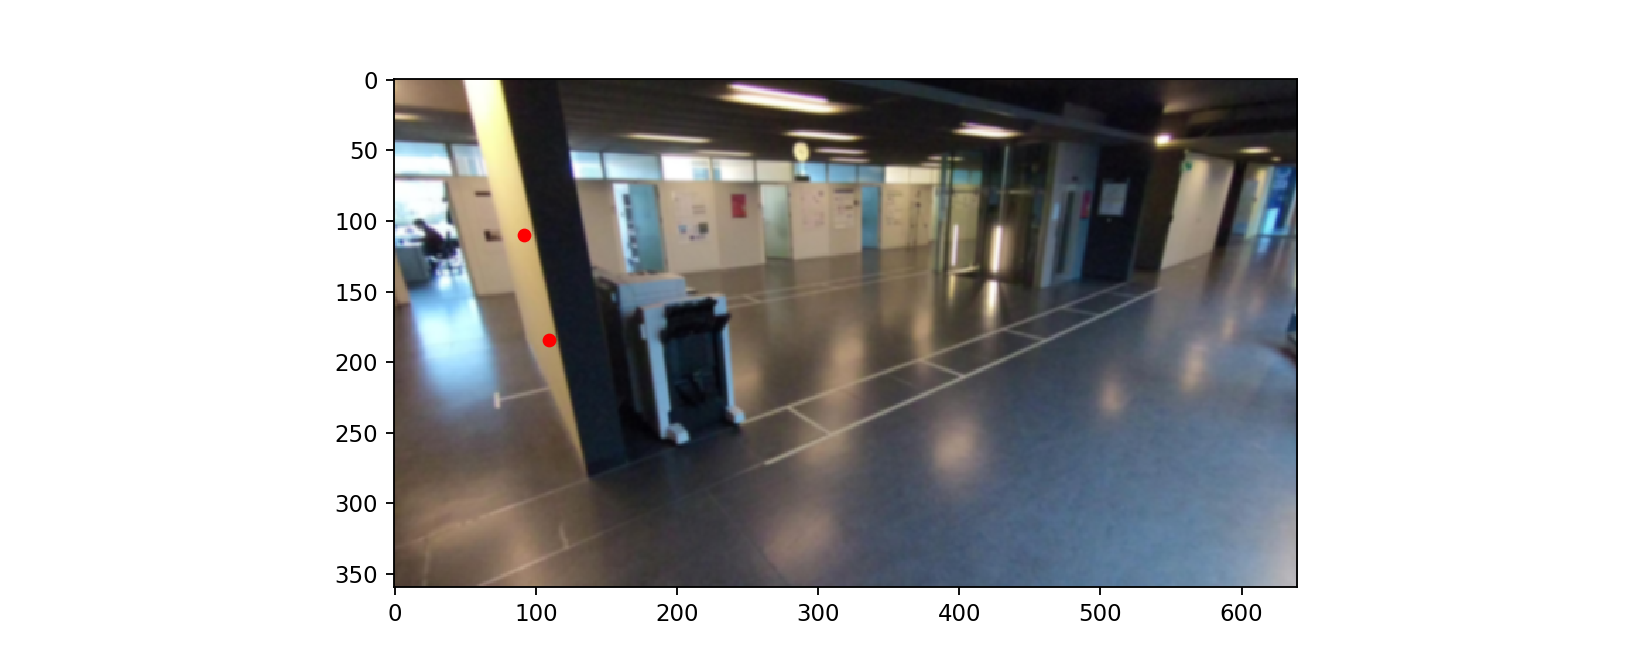

In [8]:
view_shape = (1080//3, 1920//3)
camera = pypom.CameraHbotHeight.from_json("cam0", "homographies_bottom_head_height.json", view_shape, "m")
world_points = np.array([[0,0,  0],  # this is feet position in 'm'
                         [0,0,1.8]]) # does not matter! heads plane is defined in the .json file (this is head position in 'm')

proj = np.vstack([camera.project_bottom_points(world_points[[0]]),
                  camera.project_top_points(world_points[[1]])])
print(proj)

img = pypom.utils.downsample_image(imageio.imread("frame_cam0_undistorted.JPG"), view_shape)

plt.figure(figsize=(10,4))
plt.imshow(img)
plt.plot(proj[:,0], proj[:,1], 'r.', markersize=10)